In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from scipy.stats import norm
import math
import os

%matplotlib inline
import re
import sys
import powerlaw
import matplotlib.cm as cm
import networkx as nx
import statsmodels.api as sm
from collections import Counter, defaultdict
import matplotlib.pyplot as plt

from pandas import Series, DataFrame
import struct

In [2]:
data = pd.read_csv("yelp_academic_dataset_business.csv") 

/Users/sue/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,15,19,25,39,44,51,54,60,66,71,77,91) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,attributes.Music.background_music,attributes.Coat Check,attributes.Attire,attributes.Price Range,type,attributes.Dietary Restrictions.vegetarian,attributes.Parking.street,hours.Monday.open,attributes.Good For.lunch,name,...,categories,attributes.Hair Types Specialized In.curly,attributes.Dietary Restrictions.kosher,attributes.Ambience.romantic,longitude,attributes.Ambience.intimate,attributes.Parking.validated,attributes.By Appointment Only,attributes.Good For.breakfast,hours.Wednesday.close
0,NaN,NaN,b'casual',1.0,b'business',NaN,False,b'11:00',False,b'Mr Hoagie',...,"['Fast Food', 'Restaurants']",NaN,NaN,False,-79.900706,False,False,NaN,False,b'21:00'
1,NaN,NaN,NaN,1.0,b'business',NaN,NaN,NaN,NaN,"b""Clancy's Pub""",...,['Nightlife'],NaN,NaN,NaN,-79.886814,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,b'business',NaN,NaN,NaN,NaN,b'Cool Springs Golf Center',...,"['Active Life', 'Mini Golf', 'Golf']",NaN,NaN,NaN,-80.014660,NaN,NaN,NaN,NaN,NaN
3,NaN,False,b'casual',2.0,b'business',NaN,False,NaN,True,"b""Emil's Lounge""",...,"['Bars', 'American (New)', 'Nightlife', 'Loung...",NaN,NaN,False,-79.866211,False,False,NaN,False,b'19:00'
4,NaN,NaN,NaN,NaN,b'business',NaN,False,NaN,NaN,b'Grand View Golf Club',...,"['Active Life', 'Golf']",NaN,NaN,NaN,-79.855782,NaN,False,NaN,NaN,b'20:00'


In [4]:
data = data [['business_id','categories','stars', 'state','review_count']]

In [5]:
data.head()

,business_id,categories,stars,state,review_count
0,b'5UmKMjUEUNdYWqANhGckJw',"['Fast Food', 'Restaurants']",3.5,b'PA',7
1,b'UsFtqoBl7naz8AVUBZMjQQ',['Nightlife'],3.0,b'PA',5
2,b'cE27W9VPgO88Qxe4ol6y_g',"['Active Life', 'Mini Golf', 'Golf']",2.5,b'PA',5
3,b'mVHrayjG3uZ_RLHkLj-AMg',"['Bars', 'American (New)', 'Nightlife', 'Loung...",4.5,b'PA',26
4,b'mYSpR_SLPgUVymYOvTQd_Q',"['Active Life', 'Golf']",5.0,b'PA',3


In [6]:
data_Phoenix = data.loc[(data['state'] == "b'AZ'")]
data_Pittsburgh = data.loc[(data['state'] == "b'PA'")]
data_Madison = data.loc[(data['state'] == "b'WI'")]
data_Charlotte = data.loc[(data['state'] == "b'NC'")]
data_ChampaignUrbana = data.loc[(data['state'] == "b'IL'")]
data_LasVegas = data.loc[(data['state'] == "b'NV'")]
data_Edinburgh  = data.loc[(data['state'] == "b'EDH'")]

In [7]:
data_Phoenix.head()

,business_id,categories,stars,state,review_count
2288,b'LUvxyWag5gpiubSxOvR92A',"['Mattresses', 'Shopping', 'Home Decor', 'Home...",2.0,b'AZ',3
2376,b'Y5t01ll9I9GtSCtqHVv2DQ',"['Shopping', 'Paint Stores', 'Home & Garden']",3.5,b'AZ',3
2377,b'x5Mv61CnZLohZWxfCVCPTQ',"['Sandwiches', 'Pizza', 'Chicken Wings', 'Rest...",3.0,b'AZ',20
2378,b'2ZnCITVa0abGce4gZ6RhIw',"['American (New)', 'Sandwiches', 'Restaurants']",3.5,b'AZ',6
2379,b'fmieXX46NLuR_0sJ-UWIHA',"['Professional Services', 'Criminal Defense La...",5.0,b'AZ',8


In [8]:
Phoenix_no = data_Phoenix['categories'].value_counts()
Pittsburgh_no = data_Pittsburgh['categories'].value_counts()
Madison_no =  data_Madison['categories'].value_counts()
Charlotte_no = data_Charlotte['categories'].value_counts()
ChampaignUrbana_no = data_ChampaignUrbana['categories'].value_counts()
LasVegas_no = data_LasVegas['categories'].value_counts()
Edinburgh_no = data_Edinburgh['categories'].value_counts()

In [9]:
print(Phoenix_no[0:5])
print(Pittsburgh_no[0:5])
print(Madison_no [0:5])
print(Charlotte_no [0:5])
print(ChampaignUrbana_no[0:5])
print(LasVegas_no[0:5])
print(Edinburgh_no[0:5])

['Mexican', 'Restaurants']                        935
['Beauty & Spas', 'Nail Salons']                  617
['Hair Salons', 'Beauty & Spas']                  546
['Home Services', 'Real Estate', 'Apartments']    471
['Pizza', 'Restaurants']                          465
Name: categories, dtype: int64
['Pizza', 'Restaurants']             141
['Food', 'Coffee & Tea']             105
['Chinese', 'Restaurants']            65
['American (New)', 'Restaurants']     62
['Restaurants', 'Italian']            60
Name: categories, dtype: int64
['Mexican', 'Restaurants']                                    65
['Hotels & Travel', 'Event Planning & Services', 'Hotels']    62
['Pizza', 'Restaurants']                                      61
['Chinese', 'Restaurants']                                    55
['Food', 'Coffee & Tea']                                      54
Name: categories, dtype: int64
['Hotels & Travel', 'Event Planning & Services', 'Hotels']    144
['Beauty & Spas', 'Nail Salons']         

In [10]:
data_Phoenix_BeaNail = data_Phoenix.loc[data['categories'] ==  "['Beauty & Spas', 'Nail Salons']"]
data_Charlotte_BeaNail = data_Charlotte.loc[data['categories'] ==  "['Beauty & Spas', 'Nail Salons']" ]
data_LasVegas_BeaNail = data_LasVegas.loc[data['categories'] ==  "['Beauty & Spas', 'Nail Salons']" ]

In [11]:
data_Phoenix_BeaNail.shape

(617, 5)

In [12]:
data_Charlotte_BeaNail.shape

(127, 5)

In [13]:
data_LasVegas_BeaNail.shape

(326, 5)

In [14]:
## The k-sample Anderson-Darling test
P_C = stats.anderson_ksamp([data_Phoenix_BeaNail['stars'], data_Charlotte_BeaNail['stars']])
P_L = stats.anderson_ksamp([data_Phoenix_BeaNail['stars'], data_LasVegas_BeaNail['stars']])
C_L = stats.anderson_ksamp([data_Charlotte_BeaNail['stars'],data_LasVegas_BeaNail['stars']])

/Users/sue/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1680: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")
/Users/sue/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1680: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


In [15]:
print(P_C)
print(P_L)
print(C_L)

Anderson_ksampResult(statistic=4.168676851653303, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.007069022028045939)
Anderson_ksampResult(statistic=-0.22808303044768743, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.4419309819324946)
Anderson_ksampResult(statistic=3.0155014085412932, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.01902476026398254)


In [16]:
data_Phoenix_BeaNail.describe()

,stars,review_count
count,617.000000,617.000000
mean,3.548622,19.706645
std,0.842308,22.437500
min,1.000000,3.000000
25%,3.000000,6.000000
50%,3.500000,14.000000
75%,4.000000,24.000000
max,5.000000,203.000000


In [17]:
# Phoenix
data_Phoenix_BeaNail_mean = data_Phoenix_BeaNail['stars'].mean()
data_Phoenix_BeaNail_sd = data_Phoenix_BeaNail['stars'].std()
data_Phoenix_BeaNail_skewness = data_Phoenix_BeaNail['stars'].skew()
data_Phoenix_BeaNail_kurtosis = data_Phoenix_BeaNail['stars'].kurtosis()
data_Phoenix_BeaNail_mode = data_Phoenix_BeaNail['stars'].mode()

#Charlotte
data_Charlotte_BeaNail_mean = data_Charlotte_BeaNail['stars'].mean()
data_Charlotte_BeaNail_sd = data_Charlotte_BeaNail['stars'].std()
data_Charlotte_BeaNail_skewness = data_Charlotte_BeaNail['stars'].skew()
data_Charlotte_BeaNail_kurtosis = data_Charlotte_BeaNail['stars'].kurtosis()
data_Charlotte_BeaNail_mode = data_Charlotte_BeaNail['stars'].mode()

#LasVegas
data_LasVegas_BeaNail_mean = data_LasVegas_BeaNail['stars'].mean()
data_LasVegas_BeaNail_sd = data_LasVegas_BeaNail['stars'].std()
data_LasVegas_BeaNail_skewness = data_LasVegas_BeaNail['stars'].skew()
data_LasVegas_BeaNail_kurtosis = data_LasVegas_BeaNail['stars'].kurtosis()
data_LasVegas_BeaNail_mode = data_LasVegas_BeaNail['stars'].mode()

In [18]:
print("Phoenix")
print("mean =",data_Phoenix_BeaNail_mean)
print("sd = ", data_Phoenix_BeaNail_sd)
print("skewness =",data_Phoenix_BeaNail_skewness)
print("kurtosis =", data_Phoenix_BeaNail_kurtosis)
print("mode =", data_Phoenix_BeaNail_mode)

Phoenix
mean = 3.548622366288493
sd =  0.8423079466361881
skewness = -0.3640226545690554
kurtosis = -0.23628740692973116
mode = 0    4.0
dtype: float64


In [19]:
print("Charlotte")
print("mean =",data_Charlotte_BeaNail_mean)
print("sd = ",data_Charlotte_BeaNail_sd)
print("skewness =",data_Charlotte_BeaNail_skewness)
print("kurtosis =",data_Charlotte_BeaNail_kurtosis)
print("mode =", data_Charlotte_BeaNail_mode)

Charlotte
mean = 3.3858267716535435
sd =  1.0296959336549445
skewness = -0.23580748454059983
kurtosis = -0.992124466294928
mode = 0    4.0
dtype: float64


In [20]:
print("LasVegas")
print("mean =",data_LasVegas_BeaNail_mean)
print("sd = ",data_LasVegas_BeaNail_sd)
print("skewness =",data_LasVegas_BeaNail_skewness)
print("kurtosis =",data_LasVegas_BeaNail_kurtosis)
print("mode =", data_LasVegas_BeaNail_mode)

LasVegas
mean = 3.5904907975460123
sd =  0.8798260693016262
skewness = -0.32916955876564347
kurtosis = -0.5007993404112878
mode = 0    3.5
1    4.0
dtype: float64


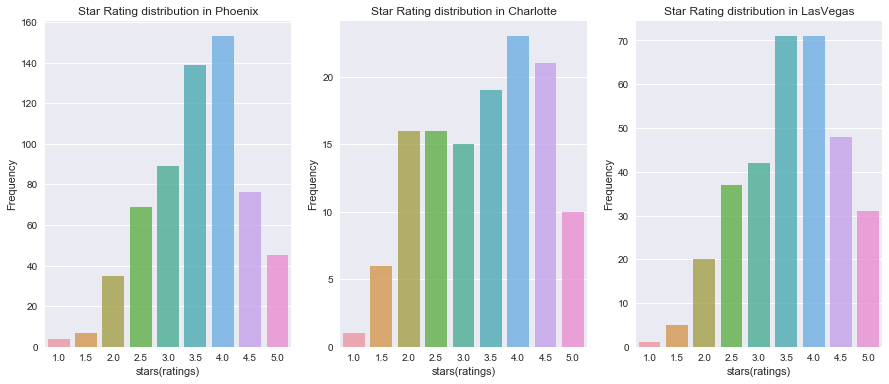

In [21]:
plt.figure(figsize=(15, 6))
sns.set(color_codes=True)
plt.subplot(1, 3, 1)
p = data_Phoenix_BeaNail['stars'].value_counts()
p = p.sort_index()
ax = sns.barplot(p.index, p.values, alpha=0.8).set_title('Star Rating distribution in Phoenix')
plt.xlabel('stars(ratings)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
c = data_Charlotte_BeaNail['stars'].value_counts()
c = c.sort_index()
sns.barplot(c.index, c.values, alpha=0.8).set_title('Star Rating distribution in Charlotte')
plt.xlabel('stars(ratings)')
plt.ylabel('Frequency')


plt.subplot(1, 3, 3)
l = data_LasVegas_BeaNail['stars'].value_counts()
l = l.sort_index()
sns.barplot(l.index, l.values, alpha=0.8).set_title('Star Rating distribution in LasVegas')
plt.xlabel('stars(ratings)')
plt.ylabel('Frequency')

plt.savefig(os.path.join('figures', 'rating distributions.png'), format='png', dpi=300)

In [22]:
data_user = pd.read_csv("yelp_academic_dataset_user.csv") 

In [23]:
data_user.head()

,compliments.more,name,compliments.funny,compliments.photos,votes.useful,votes.funny,votes.cool,compliments.cute,average_stars,user_id,...,compliments.note,compliments.plain,elite,compliments.profile,compliments.writer,review_count,compliments.cool,fans,yelping_since,type
0,3.0,b'Russel',11.0,14.0,282,167,246,15.0,4.14,b'18kPq7GPye-YQ3LyKyAZPw',...,20.0,25.0,"[2005, 2006]",8.0,9.0,108,76.0,69,b'2004-10',b'user'
1,137.0,b'Jeremy',594.0,361.0,15242,8399,12091,204.0,3.67,b'rpOyqD_893cqmDAtJLbdog',...,611.0,970.0,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",117.0,346.0,1292,1675.0,1345,b'2004-10',b'user'
2,18.0,b'Michael',96.0,27.0,1349,722,657,22.0,3.68,b'4U9kSBLuBDU391x6bxU-YA',...,79.0,86.0,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",9.0,24.0,395,134.0,105,b'2004-10',b'user'
3,NaN,b'Ken',NaN,NaN,11,1,5,2.0,4.64,b'fHtTaujcyKvXglE33Z5yIw',...,NaN,NaN,[],NaN,NaN,11,NaN,2,b'2004-10',b'user'
4,1.0,b'Katherine',NaN,NaN,37,13,16,2.0,3.80,b'SIBCL7HBkrP4llolm4SC2A',...,1.0,2.0,[2005],NaN,2.0,66,1.0,5,b'2004-10',b'user'


In [24]:
data_user = data_user[['user_id', 'review_count']]

In [25]:
data_user.head()

,user_id,review_count
0,b'18kPq7GPye-YQ3LyKyAZPw',108
1,b'rpOyqD_893cqmDAtJLbdog',1292
2,b'4U9kSBLuBDU391x6bxU-YA',395
3,b'fHtTaujcyKvXglE33Z5yIw',11
4,b'SIBCL7HBkrP4llolm4SC2A',66


In [26]:
data_review = pd.read_csv("yelp_academic_dataset_review.csv") 

In [27]:
data_review.head()

,type,stars,date,user_id,text,business_id,votes.useful,votes.cool,votes.funny,review_id
0,b'review',4,b'2012-08-01',b'PUFPaY9KxDAcGqfsorJp3Q',"b'Mr Hoagie is an institution. Walking in, it ...",b'5UmKMjUEUNdYWqANhGckJw',0,0,0,b'Ya85v4eqdd6k9Od8HbQjyA'
1,b'review',5,b'2014-02-13',b'Iu6AxdBYGR4A0wspR9BYHA',"b""Excellent food. Superb customer service. I m...",b'5UmKMjUEUNdYWqANhGckJw',0,0,0,b'KPvLNJ21_4wbYNctrOwWdQ'
2,b'review',5,b'2015-10-31',b'auESFwWvW42h6alXgFxAXQ',b'Yes this place is a little out dated and not...,b'5UmKMjUEUNdYWqANhGckJw',1,0,1,b'fFSoGV46Yxuwbr3fHNuZig'
3,b'review',3,b'2015-12-26',b'qiczib2fO_1VBG8IoCGvVg',b'PROS: Italian hoagie was delicious. Friendl...,b'5UmKMjUEUNdYWqANhGckJw',0,0,0,b'pVMIt0a_QsKtuDfWVfSk2A'
4,b'review',2,b'2016-04-08',b'qEE5EvV-f-s7yHC0Z4ydJQ',b'First the only reason this place could possi...,b'5UmKMjUEUNdYWqANhGckJw',1,0,0,b'AEyiQ_Y44isJmNbMTyoMKQ'


In [28]:
data_review = data_review[['user_id','business_id']]

In [29]:
data_review = pd.merge(left=data_review,right=data,how='left',on = 'business_id')

In [30]:
data_review.head()

,user_id,business_id,categories,stars,state,review_count
0,b'PUFPaY9KxDAcGqfsorJp3Q',b'5UmKMjUEUNdYWqANhGckJw',"['Fast Food', 'Restaurants']",3.5,b'PA',7
1,b'Iu6AxdBYGR4A0wspR9BYHA',b'5UmKMjUEUNdYWqANhGckJw',"['Fast Food', 'Restaurants']",3.5,b'PA',7
2,b'auESFwWvW42h6alXgFxAXQ',b'5UmKMjUEUNdYWqANhGckJw',"['Fast Food', 'Restaurants']",3.5,b'PA',7
3,b'qiczib2fO_1VBG8IoCGvVg',b'5UmKMjUEUNdYWqANhGckJw',"['Fast Food', 'Restaurants']",3.5,b'PA',7
4,b'qEE5EvV-f-s7yHC0Z4ydJQ',b'5UmKMjUEUNdYWqANhGckJw',"['Fast Food', 'Restaurants']",3.5,b'PA',7


In [74]:
# plt.figure(figsize=(15, 6))
# plt.subplot(1, 2, 1)
# data_review_AZ = data_review.loc[data_review['state'] ==  "b'AZ'"]
# data_review_AZ = data_review_AZ['user_id'].value_counts()
# data_review_AZZ = data_review_AZ.value_counts().sort_index()

# X= data_review_AZZ.index
# Y= data_review_AZZ.values/sum(data_review_AZZ.values)
# X_parameter=[]
# Y_parameter=[]

# X=np.log10(X)
# Y=np.log10(Y)


# sns.set(color_codes=True)

# plt.scatter(X, Y, marker = '+', facecolor = 'black')
# plt.title('the number of reviews received by each individual user in Phoenix')
# plt.xlabel('the number of reviews(10^x)')
# plt.ylabel('Frequency(10^y)')

# for single_square_feet ,single_price_value in zip(X,Y):
#     X_parameter.append([float(single_square_feet)])
#     Y_parameter.append(float(single_price_value))

# regr = linear_model.LinearRegression()
# regr.fit(X_parameter, Y_parameter)

# plt.plot(X_parameter, regr.predict(X_parameter), color='blue',linewidth=2)

# print('Coefficients:', regr.coef_,)
# print('Intercept:',regr.intercept_)
# print("Residual sum of squares: %.8f"
#       % np.mean((regr.predict(X_parameter) - Y_parameter) ** 2))

# r = data_review_AZZ.index   
# r = r[round(len(r)*0.9): len(r)]     # capture the tail -- top 10% of returns 
# N = len(r)
# alpha_1 = N/(sum(np.log(r/r.min())))
# print('alpha:', alpha_1)

# plt.subplot(1, 2, 2)
# X= data_review_AZZ.index
# y = (alpha_1/min(X)) *( (X/min(X))**(-alpha_1-1))
# Y= data_review_AZZ.values/sum(data_review_AZZ.values)
# plt.xscale('log')
# plt.yscale('log')
# plt.scatter(X, Y, marker = '+', facecolor = 'black')
# plt.scatter(X,y,marker='x',  facecolor = 'red')

In [31]:
data_review_AZ = data_review.loc[data_review['state'] ==  "b'AZ'"]
data_review_AZ = data_review_AZ['user_id'].value_counts()
data_review_AZZ = data_review_AZ.value_counts().sort_index()
X= data_review_AZZ.index
Y= data_review_AZZ.values/sum(data_review_AZZ.values)
pd = DataFrame(Y, index = X, columns = ['Y'])

In [38]:
def ksdistance(f1, f2):    
    cdf_f1 = [0.0]
    cdf_f2 = [0.0]
    for i in range(len(f1)):
        cdf_f1.append(cdf_f1[-1] + f1[i])
        cdf_f2.append(cdf_f2[-1] + f2[i])
    #print zip(cdf_f1, cdf_f2)
    tmplist = []
    for i in range(len(f1)+1):
        tmplist.append( float(abs(cdf_f1[i] - cdf_f2[i])) )
    return max(tmplist)

def bestgamma(degrees, thelist, kmin):
    gamma = -1
    est_tmp, est_n = 0, 0
    for j, p_j in zip(degrees[kmin:], thelist[kmin:]):
        f_j = p_j
        est_tmp +=  f_j * np.log( 1.0 * j / (degrees[kmin] - 0.5) )
        est_n += f_j 
    gamma = 1.0 + est_n / est_tmp
    
    # in the paper "Power-law distributions in empirical data"
    C = 1.0 / sum([np.power(i,-gamma) for i in degrees[kmin:]]) 
    return gamma, C

def ideal(degrees, gammaval, C, kmin, m):
    tmp = np.zeros(len(degrees))
    for i, deg in zip(range(kmin,m,1), degrees[kmin:m]):
        tmp[i] = C * np.power(deg, -gammaval)
    return tmp

kmin = 1


In [39]:
gamma, C = bestgamma(X, Y, kmin)

In [40]:
gamma, C 

(1.964834920702205, 1.4817554996033304)

In [41]:
f2 = ideal(X, gamma, C, kmin, len(X))

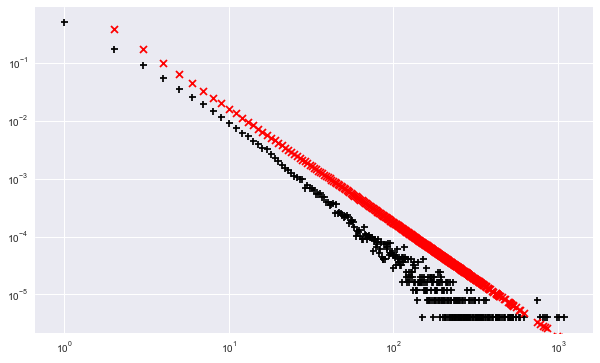

In [42]:
plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.yscale('log')
plt.scatter(X, Y, marker = '+', facecolor = 'black')
plt.scatter(X,f2,marker='x',  facecolor = 'red')


In [43]:
ksdistance(Y, f2)

0.5023843450944833

In [44]:
def synthetic(degrees, f2):
    np.random.seed(None)
    tmp = np.zeros(len(X))
    for i in range(5000):
        deg = np.random.choice(degrees, p=f2)
        tmp[deg] += 1
        tmp = tmp / tmp.sum()
    return tmp

from joblib import Parallel, delayed


In [56]:
ks_list = []
def ks_list(df):
    f3 = synthetic(len(X), f2)
    return ksdistance(Y, f3) 

In [57]:
ks_list = Parallel(n_jobs=-1)(delayed(ks_list)(pd) for _ in range(5000))

In [47]:
ks = np.array(ks_list)
print ("p-value=", 1.0 * sum(ks >0.5023843450944833) / len(ks))

p-value= 0.3916


In [63]:
kmin = 3
data_review_business = data_Phoenix['review_count'].value_counts().sort_index()
X1= data_review_business.index
Y1= data_review_business.values/sum(data_review_business.values)
pd1 = DataFrame(Y1, index = X1, columns = ['Y1'])
gamma1, C1 = bestgamma(X1, Y1, kmin)
f2_ = ideal(X1, gamma1, C1, kmin, len(X1))


In [64]:
gamma1

1.7492494645262533

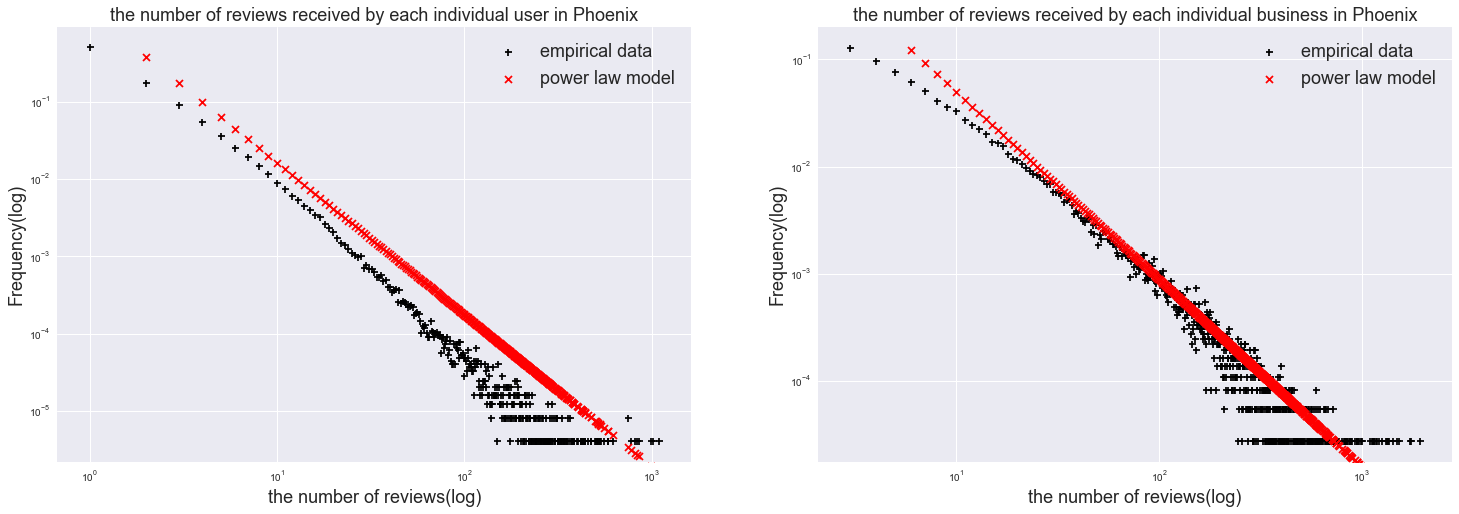

In [65]:
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.xscale('log')
plt.yscale('log')
plt.scatter(X, Y, marker = '+', facecolor = 'black', label='empirical data')
plt.scatter(X,f2,marker='x',  facecolor = 'red', label = 'power law model' )
plt.title('the number of reviews received by each individual user in Phoenix',fontsize = 18)
plt.xlabel('the number of reviews(log)',fontsize = 18)
plt.ylabel('Frequency(log)',fontsize = 18)
plt.legend(loc='upper right',fontsize = 18)


plt.subplot(1, 2, 2)
plt.xscale('log')
plt.yscale('log')
plt.scatter(X1, Y1, marker = '+', facecolor = 'black',label='empirical data')
plt.scatter(X1,f2_,marker='x',  facecolor = 'red',label='power law model')
plt.title('the number of reviews received by each individual business in Phoenix',fontsize = 18)
plt.xlabel('the number of reviews(log)',fontsize = 18)
plt.ylabel('Frequency(log)',fontsize = 18)
plt.legend(loc='upper right',fontsize = 18)

plt.savefig(os.path.join('figures', 'review distributions.png'), format='png', dpi=300)

In [66]:
ksdistance(Y1, f2_)

0.30254794520547945

In [52]:
def synthetic(degrees, f2):
    np.random.seed(None)
    tmp = np.zeros(len(X1))
    for i in range(5000):
        deg = np.random.choice(degrees, p=f2)
        tmp[deg] += 1
        tmp = tmp / tmp.sum()
    return tmp


In [68]:
ks_list1 = []
def ks_list1(df):
    f3_ = synthetic(len(X1), f2_)
    return ksdistance(Y1, f3_) 

In [69]:
ks_list1 = Parallel(n_jobs=-1)(delayed(ks_list1)(pd1) for _ in range(5000))

In [70]:
ks_list1 

[0.6047397283666462,
 0.3631054502046671,
 0.5835432890149439,
 0.34805908063782354,
 0.7048816038226737,
 0.6288812398769952,
 0.5829547358277711,
 0.30254794520547945,
 0.46039503155202954,
 0.6859956772744703,
 0.30254794520547945,
 0.6943995198944509,
 0.30254794520547945,
 0.5513300191598111,
 0.45633962470927664,
 0.62623987362242,
 0.4977912666717853,
 0.4262192097617129,
 0.5981123195757959,
 0.39884061362216194,
 0.6507914944379062,
 0.6724056697516069,
 0.3460653628432936,
 0.30254794520547945,
 0.363746494636527,
 0.44617426405173227,
 0.30254794520547945,
 0.5391864803041515,
 0.5458981164384771,
 0.30254794520547945,
 0.4540972362675128,
 0.3623617595887347,
 0.3447044714069546,
 0.4149587811659,
 0.5803443814839886,
 0.3508404828569562,
 0.30254794520547945,
 0.5999432509020719,
 0.3640659790841576,
 0.30254794520547945,
 0.48844068563701115,
 0.4957561662259037,
 0.7144457582645781,
 0.3651157303781354,
 0.47923883083357066,
 0.44379636126210104,
 0.5636501738189038,
 0.

In [71]:
ks = np.array(ks_list1)
print ("p-value=", 1.0 * sum(ks >0.30254794520547945) / len(ks))

p-value= 0.884


In [59]:
# plt.figure(figsize=(15, 6))
# plt.subplot(1, 2, 1)
# data_review_business = data['review_count'].value_counts()
# X= data_review_business.index
# Y= data_review_business.values/sum(data_review_business.values)
# X_parameter=[]
# Y_parameter=[]

# X=np.log10(X)
# Y=np.log10(Y)


# sns.set(color_codes=True)

# plt.scatter(X, Y, marker = '+', facecolor = 'black')
# plt.title('the number of reviews received by each individual business in Phoenix')
# plt.xlabel('the number of reviews(10^x)')
# plt.ylabel('Frequency(10^y)')

# for single_square_feet ,single_price_value in zip(X,Y):
#     X_parameter.append([float(single_square_feet)])
#     Y_parameter.append(float(single_price_value))

# regr = linear_model.LinearRegression()
# regr.fit(X_parameter, Y_parameter)

# plt.plot(X_parameter, regr.predict(X_parameter), color='blue',linewidth=2)

# print('Coefficients:', regr.coef_,)
# print('Intercept:',regr.intercept_)
# print("Residual sum of squares: %.8f"
#       % np.mean((regr.predict(X_parameter) - Y_parameter) ** 2))

# r = data_review_business.index
# r = r[round(len(r)*0.9):len(r)]    
# N = len(r)
# alpha_2 = N/(sum(np.log(r/r.min())))
# print('alpha:', alpha_2)


# plt.subplot(1, 2, 2)
# X= data_review_business.index
# Y= data_review_business.values/sum(data_review_business.values)
# y = (alpha_2/min(X)) *( (X/min(X))**(-alpha_2-1))
# plt.xscale('log')
# plt.yscale('log')
# plt.scatter(X, Y, marker = '+', facecolor = 'black')
# plt.scatter(X,y,marker='x',  facecolor = 'red')